## Trabalho - Morfologia Matemática

> Programa de Pós-Graduação em Engenharia Elétrica e de Computação

> Processamento Digital de Imagens

In [3]:
# Importação das bibliotecas
import numpy as np 
import cv2
from matplotlib import pyplot as plt
import os
import glob
import pathlib

In [4]:
def load_data(datadir):
    img_array = []
    path = os.path.join(datadir)
    path_list  = list(os.listdir(path))
    for img in path_list:
        img_array.append(cv2.imread(os.path.join(path, img)))
    return img_array

imgs_cinza = load_data('imgs_cinza')

> Definindo os elementos estruturantes: Retângulo, círculo e cruz

In [5]:
def kernel(dim):
    kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT,(dim,dim)) #retang
    kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dim,dim)) # elipse/circular
    kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(dim,dim)) # cruz
     
    return kernel_rect, kernel_ellipse, kernel_cross

>Operações de Erosão e Dilatação

In [6]:
def erosao(img, dim):
    kernel_rect, kernel_ellipse, kernel_cross = kernel(dim)
    
    erosion_rect = cv2.erode(img,kernel_rect,iterations = 1)
    erosion_ellipse = cv2.erode(img,kernel_ellipse,iterations = 1)
    erosion_cross = cv2.erode(img,kernel_cross,iterations = 1)
    
    return erosion_rect, erosion_ellipse, erosion_cross

def dilatacao(img, dim):
    kernel_rect, kernel_ellipse, kernel_cross = kernel(dim)
    
    dilate_rect = cv2.dilate(img,kernel_rect,iterations = 1)
    dilate_ellipse = cv2.dilate(img,kernel_ellipse,iterations = 1)
    dilate_cross = cv2.dilate(img,kernel_cross,iterations = 1)
    
    return dilate_rect, dilate_ellipse, dilate_cross

> Operações de Abertura e Fechamento

In [7]:
def opening(img, dim):
    kernel_rect, kernel_ellipse, kernel_cross = kernel(dim)
    
    opening_rect = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_rect)
    opening_ellipse = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_ellipse)
    opening_cross = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_cross)
    
    return opening_rect, opening_ellipse, opening_cross

def closing(img, dim):
    kernel_rect, kernel_ellipse, kernel_cross = kernel(dim)
    
    closing_rect = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_rect)
    closing_ellipse = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_ellipse)
    closing_cross = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_cross)
    
    return closing_rect, closing_ellipse, closing_cross

> Plot das imagens

In [8]:
def plotImage(img, img_3, img_5, img_7, op, elem):  
    plt.figure(figsize=(15,12))

    plt.subplot(1, 4, 1), plt.imshow(img), plt.title("Original")
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 4, 2), plt.imshow(img_3), plt.title("{} - {} (5x5)".format(op, elem))
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 4, 3), plt.imshow(img_5), plt.title("{} - {} (11x11)".format(op, elem))
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 4, 4), plt.imshow(img_7), plt.title("{} - {} (25x25)".format(op, elem))
    plt.xticks([]), plt.yticks([])
    plt.show()

### Resultado da operação de Erosão 

> Imagens em níveis de cinza

> Elementos estruturantes: Retângulo, circular e cruz.

> Dimensões: 5x5 - 11x11 - 25x25

In [9]:
def resultErosion(img):
    for i in range(len(img)):
        erosion_rect_5, erosion_ellipse_5, erosion_cross_5 = erosao(img[i], 5)
        erosion_rect_11, erosion_ellipse_11, erosion_cross_11 = erosao(img[i], 11)
        erosion_rect_25, erosion_ellipse_25, erosion_cross_25 = erosao(img[i], 25)

        plotImage(img[i], erosion_rect_5, erosion_rect_11, erosion_rect_25, "Erosão", "Retângulo")
        plotImage(img[i], erosion_ellipse_5, erosion_ellipse_11, erosion_ellipse_25, "Erosão", "Elipse")
        plotImage(img[i], erosion_cross_5, erosion_cross_11, erosion_cross_25, "Erosão", "Cruz")

In [10]:
#resultErosion(imgs_pb)

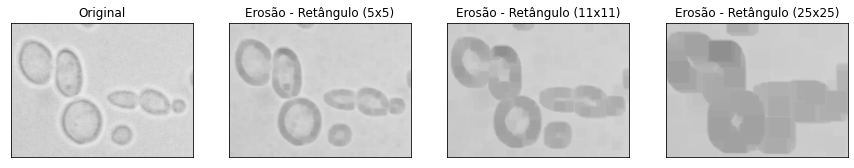

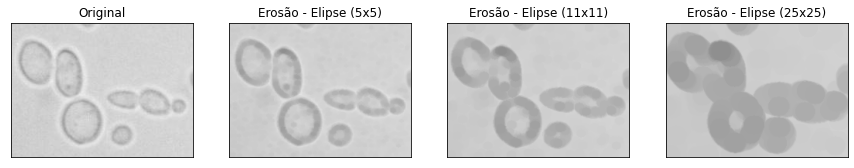

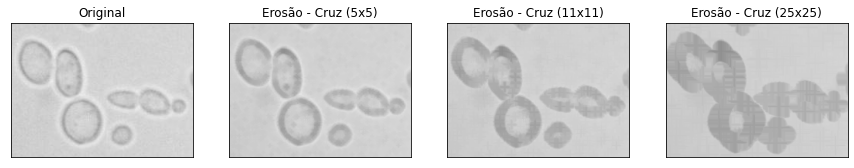

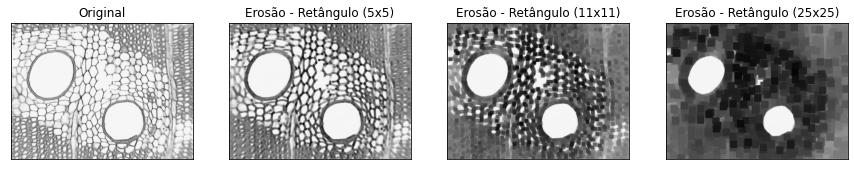

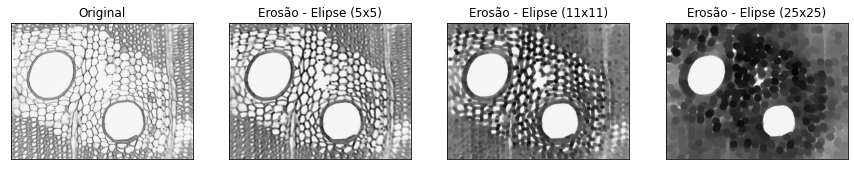

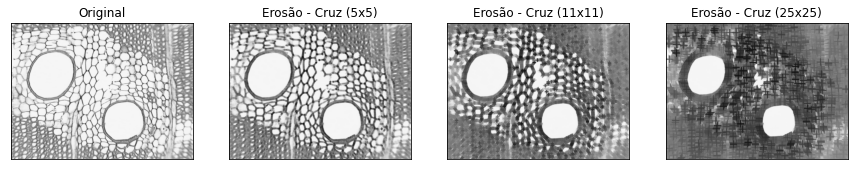

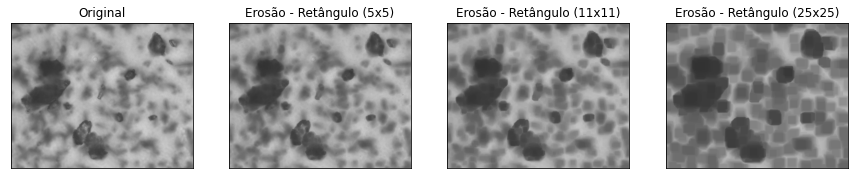

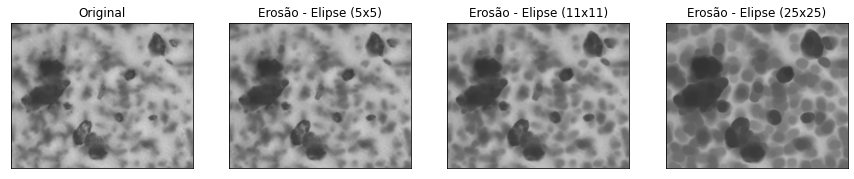

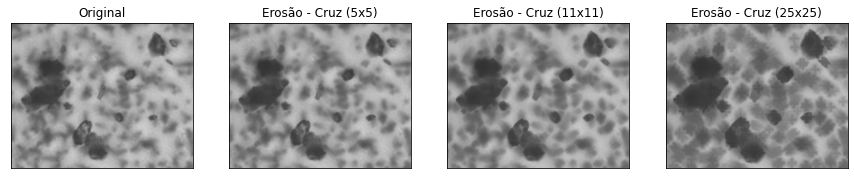

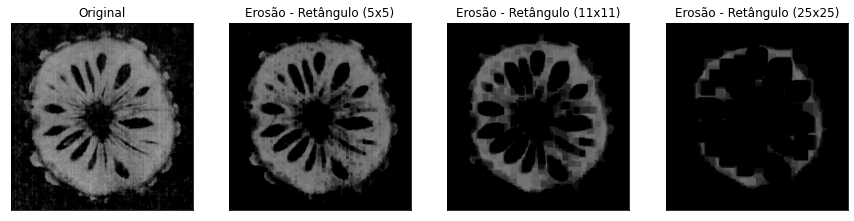

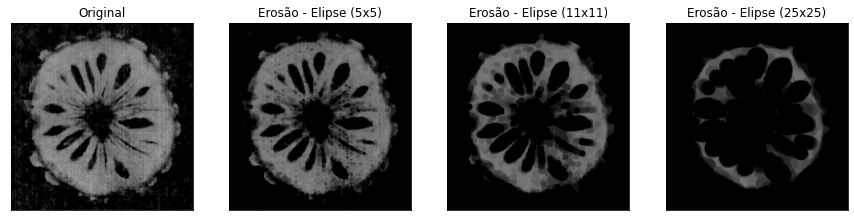

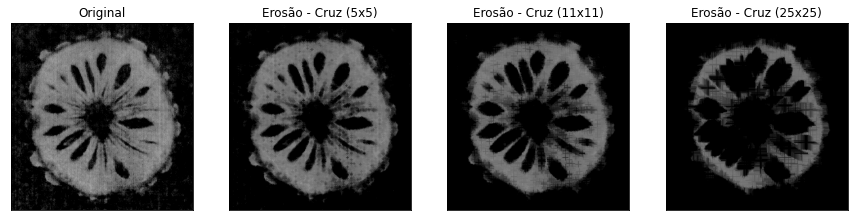

In [11]:
resultErosion(imgs_cinza)

### Resultado da operação de Dilatação 

> Imagens em níveis de cinza

> Elementos estruturantes: Retângulo, circular e cruz.

> Dimensões: 5x5 - 11x11 - 25x25

In [12]:
def resultDilate(img):
    for i in range(len(img)):
        dilate_rect_5, dilate_ellipse_5, dilate_cross_5 = dilatacao(img[i], 5)
        dilate_rect_11, dilate_ellipse_11, dilate_cross_11 = dilatacao(img[i], 11)
        dilate_rect_25, dilate_ellipse_25, dilate_cross_25 = dilatacao(img[i], 25)

        plotImage(img[i], dilate_rect_5, dilate_rect_11, dilate_rect_25, "Dilatação", "Retângulo")
        plotImage(img[i], dilate_ellipse_5, dilate_ellipse_11, dilate_ellipse_25, "Dilatação", "Elipse")
        plotImage(img[i], dilate_cross_5, dilate_cross_11, dilate_cross_25, "Dilatação", "Cruz")

In [13]:
#resultDilate(imgs_pb)

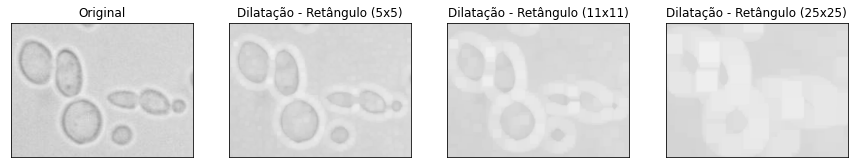

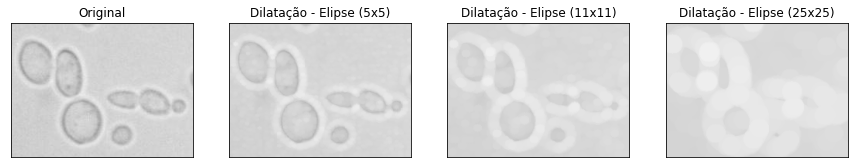

In [ ]:
resultDilate(imgs_cinza)

### Resultado da operação de Abertura 

> Imagens em níveis de cinza

> Elementos estruturantes: Retângulo, circular e cruz.

> Dimensões: 5x5 - 11x11 - 25x25

In [ ]:
def resultOpening(img):
    for i in range(len(img)):
        opening_rect_5, opening_ellipse_5, opening_cross_5 = opening(img[i], 5)
        opening_rect_11, opening_ellipse_11, opening_cross_11 = opening(img[i], 11)
        opening_rect_25, opening_ellipse_25, opening_cross_25 = opening(img[i], 25)

        plotImage(img[i], opening_rect_5, opening_rect_11, opening_rect_25, "Abertura", "Retângulo")
        plotImage(img[i], opening_ellipse_5, opening_ellipse_11, opening_ellipse_25, "Abertura", "Elipse")
        plotImage(img[i], opening_cross_5, opening_cross_11, opening_cross_25, "Abertura", "Cruz")

In [ ]:
#resultOpening(imgs_pb)

In [ ]:
resultOpening(imgs_cinza)

### Resultado da operação de Fechamento 

> Imagens em níveis de cinza

> Elementos estruturantes: Retângulo, circular e cruz.

> Dimensões: 5x5 - 11x11 - 25x25

In [ ]:
def resultClosing(img):
    for i in range(len(img)):
        closing_rect_5, closing_ellipse_5, closing_cross_5 = closing(img[i], 5)
        closing_rect_11, closing_ellipse_11, closing_cross_11 = closing(img[i], 11)
        closing_rect_25, closing_ellipse_25, closing_cross_25 = closing(img[i], 25)

        plotImage(img[i], closing_rect_5, closing_rect_11, closing_rect_25, "Fechamento", "Retângulo")
        plotImage(img[i], closing_ellipse_5, closing_ellipse_11, closing_ellipse_25, "Fechamento", "Elipse")
        plotImage(img[i], closing_cross_5, closing_cross_11, closing_cross_25, "Fechamento", "Cruz")

In [ ]:
#resultClosing(imgs_pb)

In [ ]:
resultClosing(imgs_cinza)